# Titanic

In [1]:
# Installing necessary packages
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder
from scipy import stats

## Step 1: Data (Pre-)Processing

### 1.1 Data Ingestions

Using Path Definition, and importing data into training and testing dataframes:

In [3]:
# define path where the data is stored
path = 'data/titanic/'
# import all datafiles into dataframes
train = pd.read_csv(f'{path}train.csv')
test = pd.read_csv(f'{path}test.csv')

Making sure import was succesfull:

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.2 Data Inspection

#### Meta Information

PassengerId, Cabin and Ticket are uninformative variables. They will later on need to be dropped.
Variable sex is not encoded yet. 
Numerical variables are: sibs, parch, fare, ...

Check https://www.kaggle.com/c/titanic/data

#### Data Types

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Not interested in Name. Also needs to be dropped. Sex and Embarked needs to be encoded. Age in float: curious. Age and Embarked contain missing values.

### Sampling

In [7]:
#train.head()
#train.tail()
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S


#### Summarizing

In [8]:
#train.describe(include='all')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
o_vars = ["Pclass", "Age", "SibSp", "Parch"]
treshold = 3
for var in o_vars:
    print(var)
    z = np.abs(stats.zscore(train[var]))
    print(np.where(z > treshold))

Pclass
(array([], dtype=int64),)
Age
(array([], dtype=int64),)
SibSp
(array([ 16,  50,  59,  68,  71, 119, 159, 164, 171, 180, 182, 201, 233,
       261, 266, 278, 324, 386, 480, 541, 542, 683, 686, 787, 792, 813,
       824, 846, 850, 863]),)
Parch
(array([ 13,  25,  86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774,
       858, 885]),)


<ipython-input-9-989cb7f127e7>:6: RuntimeWarning: invalid value encountered in greater
  print(np.where(z > treshold))


## 1.3 Cleaning

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
o_vars = ["Pclass", "Age", "SibSp", "Parch"]
treshold = 3
for var in o_vars:
    print(var)
    z = np.abs(stats.zscore(train[var]))
    print(np.where(z > treshold))

Pclass
(array([], dtype=int64),)
Age
(array([], dtype=int64),)
SibSp
(array([ 16,  50,  59,  68,  71, 119, 159, 164, 171, 180, 182, 201, 233,
       261, 266, 278, 324, 386, 480, 541, 542, 683, 686, 787, 792, 813,
       824, 846, 850, 863]),)
Parch
(array([ 13,  25,  86, 167, 360, 437, 438, 567, 610, 638, 678, 736, 774,
       858, 885]),)


<ipython-input-11-989cb7f127e7>:6: RuntimeWarning: invalid value encountered in greater
  print(np.where(z > treshold))


### Cleaning

In [12]:
data_cleaner = [train, test]

In [13]:
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

Delete uninformative variables (PassengerId, Cabin, Ticker):

In [14]:
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
for dataset in data_cleaner:
    dataset.drop(drop_column, axis=1, inplace = True)

In [15]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Create

In [16]:
pd.options.mode.chained_assignment = None  # default='warn'

###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


In [17]:


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (train['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train['Title'].value_counts())
print("-"*10)


#preview data again
train.info()
train.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
428,0,3,"Flynn, Mr. James",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
824,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,39.6875,S,6,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
703,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,7.7417,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S,6,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
517,0,3,"Ryan, Mr. Patrick",male,28.0,0,0,24.1500,Q,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
180,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.5500,S,11,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
415,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,28.0,0,0,8.0500,S,1,1,Mrs,"(7.91, 14.454]","(16.0, 32.0]"
464,0,3,"Maisner, Mr. Simon",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
382,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"


### Convert

In [18]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [19]:


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
train_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
train_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
train_xy =  Target + train_x
print('Original X Y: ', train_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
train_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
train_xy_bin = Target + train_x_bin
print('Bin X Y: ', train_xy_bin, '\n')


#define x and y variables for dummy features original
train_dummy = pd.get_dummies(train[train_x])
train_x_dummy = train_dummy.columns.tolist()
train_xy_dummy = Target + train_x_dummy
print('Dummy X Y: ', train_xy_dummy, '\n')



train_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [20]:
print('Train columns with null values: \n', train.isnull().sum())
print("-"*10)
print (train.info())
print("-"*10)

#print('Test/Validation columns with null values: \n', data_val.isnull().sum())
#print("-"*10)
#print (data_val.info())
#print("-"*10)

#data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

## Step 2: Explorative Data Analysis

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   FamilySize     891 non-null    int64   
 10  IsAlone        891 non-null    int64   
 11  Title          891 non-null    object  
 12  FareBin        891 non-null    category
 13  AgeBin         891 non-null    category
 14  Sex_Code       891 non-null    int64   
 15  Embarked_Code  891 non-null    int64   
 16  Title_Code     891 non-null    int64   
 17  AgeBin_Code    891 non-null    int6

Variable to predict: Survived

Numerical predictor variables: Age, Fare, FamilySize

Categorical predictor variables: Pclass, Sex_Code, Embarked_Code, Title_Code

Note: several numerical variables are also included as categorical variable. First investigate influence by using original variable, then decide what to do.

### Univariate

#### Goal variable

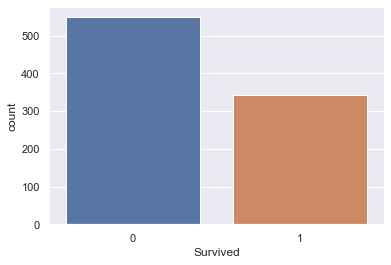

In [54]:
# Bar plot
sns.countplot(x='Survived', data=train)
plt.show()

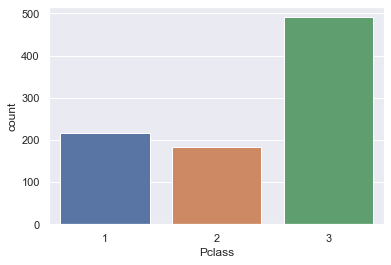

In [43]:
# Bar plot
sns.countplot(x='Pclass', data=train)
plt.show()

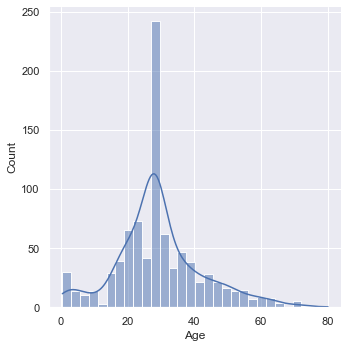

In [53]:
# Histogram
sns.displot(train['Age'], kde=True)
plt.show()

### Bivariate

#### Influence of Numerical Predictors (univ.)

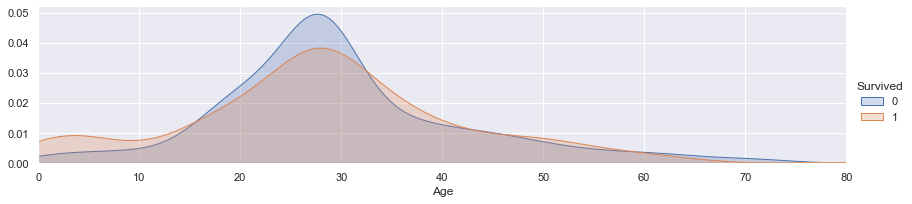

In [22]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

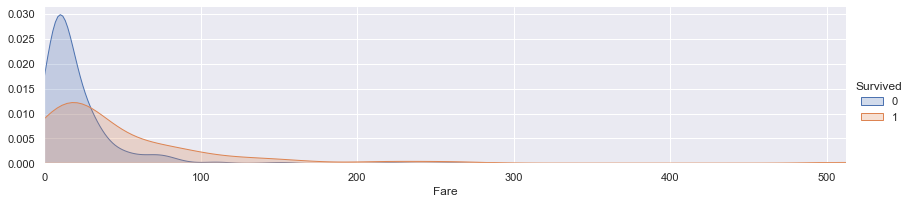

In [38]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Fare', shade= True )
a.set(xlim=(0 , train['Fare'].max()))
a.add_legend()

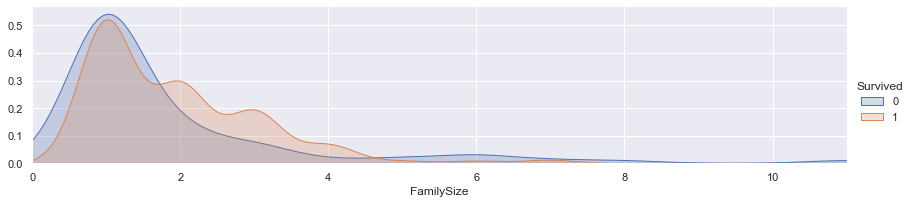

In [39]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'FamilySize', shade= True )
a.set(xlim=(0 , train['FamilySize'].max()))
a.add_legend()

#### Influence of Categorical Predictors (univ.)

### Multivariate

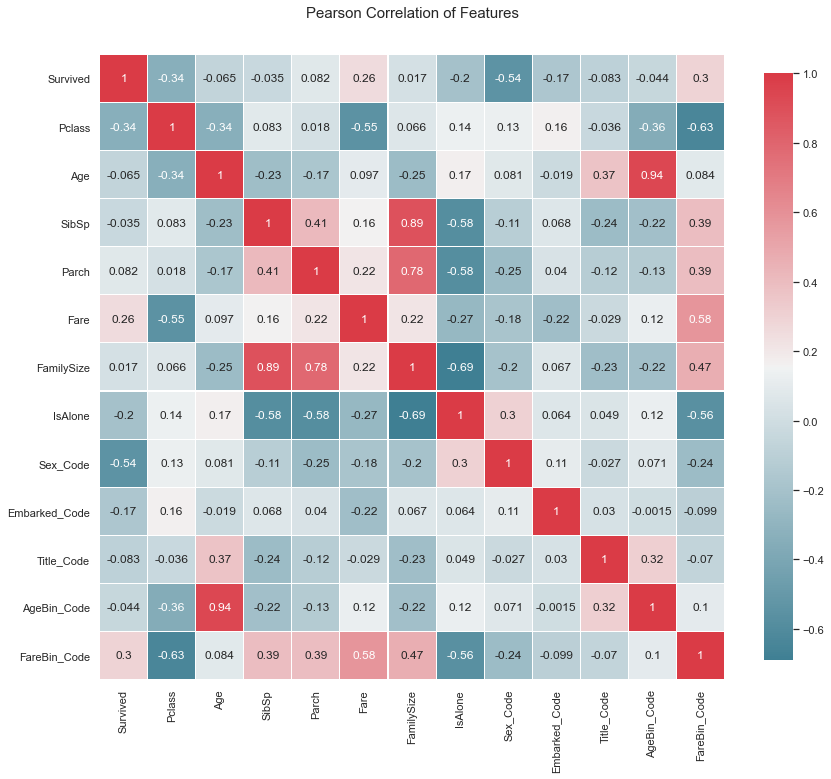

In [21]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

In [32]:
#train.describe()
vars = ["Survived", "Age", "FamilySize", "Fare"]
train_vars = train[vars]

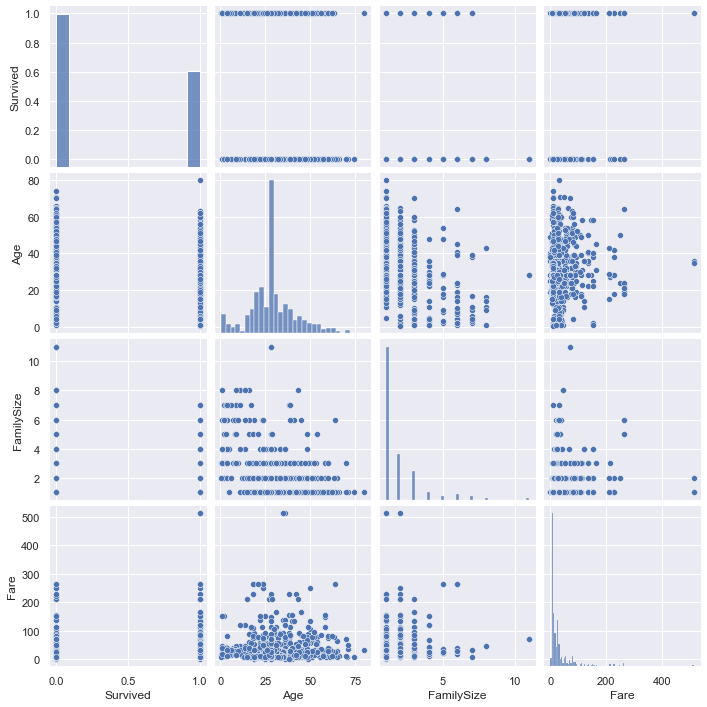

In [35]:
sns.pairplot(train[vars])

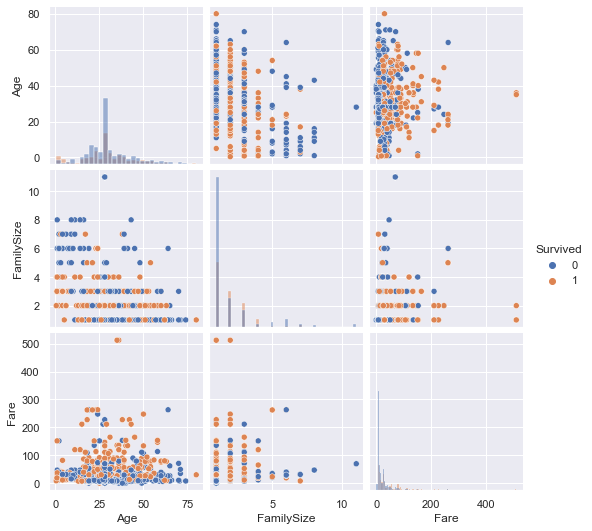

In [36]:
sns.pairplot(train[vars], hue="Survived", diag_kind="hist")

In [ ]:
	
features = ['Sex', 'Age', 'Pclass', 'Fare', 'Family', 'Alone', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
	
y_train = train['Survived']
	
y_test = test['Survived']
	
x_train = train[features]
	
x_test = test[features]
	
 
	
scaler = StandardScaler()
	
x_train = scaler.transform(x_train)
	
x_test = scaler.transform(x_test)
	
 
	
model = LogisticRegression()
	
model.fit(x_train, y_train)
	
 
	
# score on train data
	
print(model.score(x_train, y_train))
	
 
	
# score on test data
	
print(model.score(x_test, y_test))

In [ ]:
	
from sklearn.feature_selection import RFECV
	
# Create the RFE object and compute a cross-validated score.
	
# The "accuracy" scoring is proportional to the number of correct classifications
	
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
	
rfecv.fit(X, y)
	
 
	
print("Optimal number of features: %d" % rfecv.n_features_)
	
print('Selected features: %s' % list(X.columns[rfecv.support_]))
	
 
	
# Plot number of features VS. cross-validation scores
	
plt.figure(figsize=(10,6))
	
plt.xlabel("Number of features selected")
	
plt.ylabel("Cross validation score (nb of correct classifications)")
	
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
	
plt.show()